In [23]:
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [25]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [27]:
for column in df.columns:
    print(df[column].name,df[column].value_counts(),'\n') #checking the unique value counts

id id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64 

gender gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

age age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64 

hypertension hypertension
0    4612
1     498
Name: count, dtype: int64 

heart_disease heart_disease
0    4834
1     276
Name: count, dtype: int64 

ever_married ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

work_type work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Residence_type Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 

avg_glucose_level avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16   

In [28]:
# id - unique
# gender - descrete
# age - continuous
# hypertension - 0/1
# heart_disease - 0/1
# ever_married - 0/1
# work_type - descrete
# Residence_type - Urban/Rural
# avg_glucose_level - continuous
# bmi - continuous
# smoking_status - Descrete
# stroke - 1-True ,2-False

In [29]:
(df.describe())

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [30]:
(df.describe(include = 'object')) #object description

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [31]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data Preprocessing

In [32]:
# 1.bmi has 201 null values, cannot take avg or median as it depends on height and weight of individual
print('Only', np.round((201/5110)*100)," % data is missing, we can eliminate them")
df.dropna(axis = 0,inplace = True)

Only 4.0  % data is missing, we can eliminate them


In [33]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

In [34]:
# df.drop(df[df['gender']=='Other'],axis = 0,inplace = True)

df.drop(df[df['gender']=='Other'].index,axis=0,inplace = True) #dropping a row where gender is 'other' 

In [35]:
df.shape

(4908, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


In [37]:
#exploring dataframe using group by of 'work type' column
work_type_gb = df.groupby('work_type')
work_type_gb.mean(numeric_only = True)


id        age  hypertension  heart_disease  \
work_type                                                             
Govt_job       37298.046032  50.717460      0.106349       0.052381   
Never_worked   38274.409091  16.181818      0.000000       0.000000   
Private        37538.265480  45.210676      0.090747       0.049466   
Self-employed  36004.633548  59.916129      0.166452       0.090323   
children       36015.850969   6.877973      0.000000       0.001490   

               avg_glucose_level        bmi    stroke  
work_type                                              
Govt_job              107.356825  30.522063  0.044444  
Never_worked           96.042727  25.545455  0.000000  
Private               105.647591  30.307438  0.045196  
Self-employed         112.389161  30.211871  0.068387  
children               94.009806  20.038003  0.001490

In [38]:
#exploring dataframe using group by of 'residence type' column
residence_type_gb = df.groupby('Residence_type')
residence_type_gb.mean(numeric_only = True)

id        age  hypertension  heart_disease  \
Residence_type                                                         
Rural           36950.340364  42.621737      0.092225       0.050041   
Urban           37167.323695  43.108739      0.091566       0.048996   

                avg_glucose_level        bmi    stroke  
Residence_type                                          
Rural                  105.632821  28.896898  0.041356  
Urban                  104.971683  28.892289  0.043775

In [39]:
#exploring dataframe using group by of 'smoking status' column
smoking_status_gb = df.groupby('smoking_status')
smoking_status_gb.mean(numeric_only = True)

id        age  hypertension  heart_disease  \
smoking_status                                                          
Unknown          36429.723533  29.511207      0.028995       0.024949   
formerly smoked  37465.031100  54.958134      0.131579       0.083732   
never smoked     37108.811555  46.469222      0.116631       0.043737   
smokes           37748.974220  46.986431      0.111262       0.074627   

                 avg_glucose_level        bmi    stroke  
smoking_status                                           
Unknown                  98.335927  25.666352  0.019555  
formerly smoked         112.543038  30.757177  0.068182  
never smoked            107.136215  29.982559  0.045356  
smokes                  106.465699  30.543555  0.052917

In [40]:
missing_smoke = round(df[df['smoking_status']=='Unknown'].shape[0]/df.shape[0]*100,2)

print(missing_smoke, "% data is missing in smoking status feature, cannot simply eliminate this much data")

30.22 % data is missing in smoking status feature, cannot simply eliminate this much data


In [41]:
#exploring dataframe using group by of 'gender' column
gender_gb = df.groupby('gender')
gender_gb.mean(numeric_only = True)

id        age  hypertension  heart_disease  \
gender                                                         
Female  36947.181912  43.437805      0.086641       0.034518   
Male    37223.556937  42.049130      0.099453       0.071109   

        avg_glucose_level        bmi    stroke  
gender                                          
Female         103.329914  29.065758  0.041422  
Male           108.131721  28.647936  0.044257

In [42]:
#exploring dataframe using group by of 'ever married' column
ever_married_gb = df.groupby('ever_married')
ever_married_gb.mean(numeric_only = True)

id        age  hypertension  heart_disease  \
ever_married                                                         
No            36568.188967  21.815798      0.027582       0.016432   
Yes           37322.211298  54.065543      0.126092       0.067104   

              avg_glucose_level        bmi    stroke  
ever_married                                          
No                    96.059742  25.216373  0.013498  
Yes                  110.210315  30.850749  0.058052

# Exploratory Data Analysis(EDA)

In [43]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


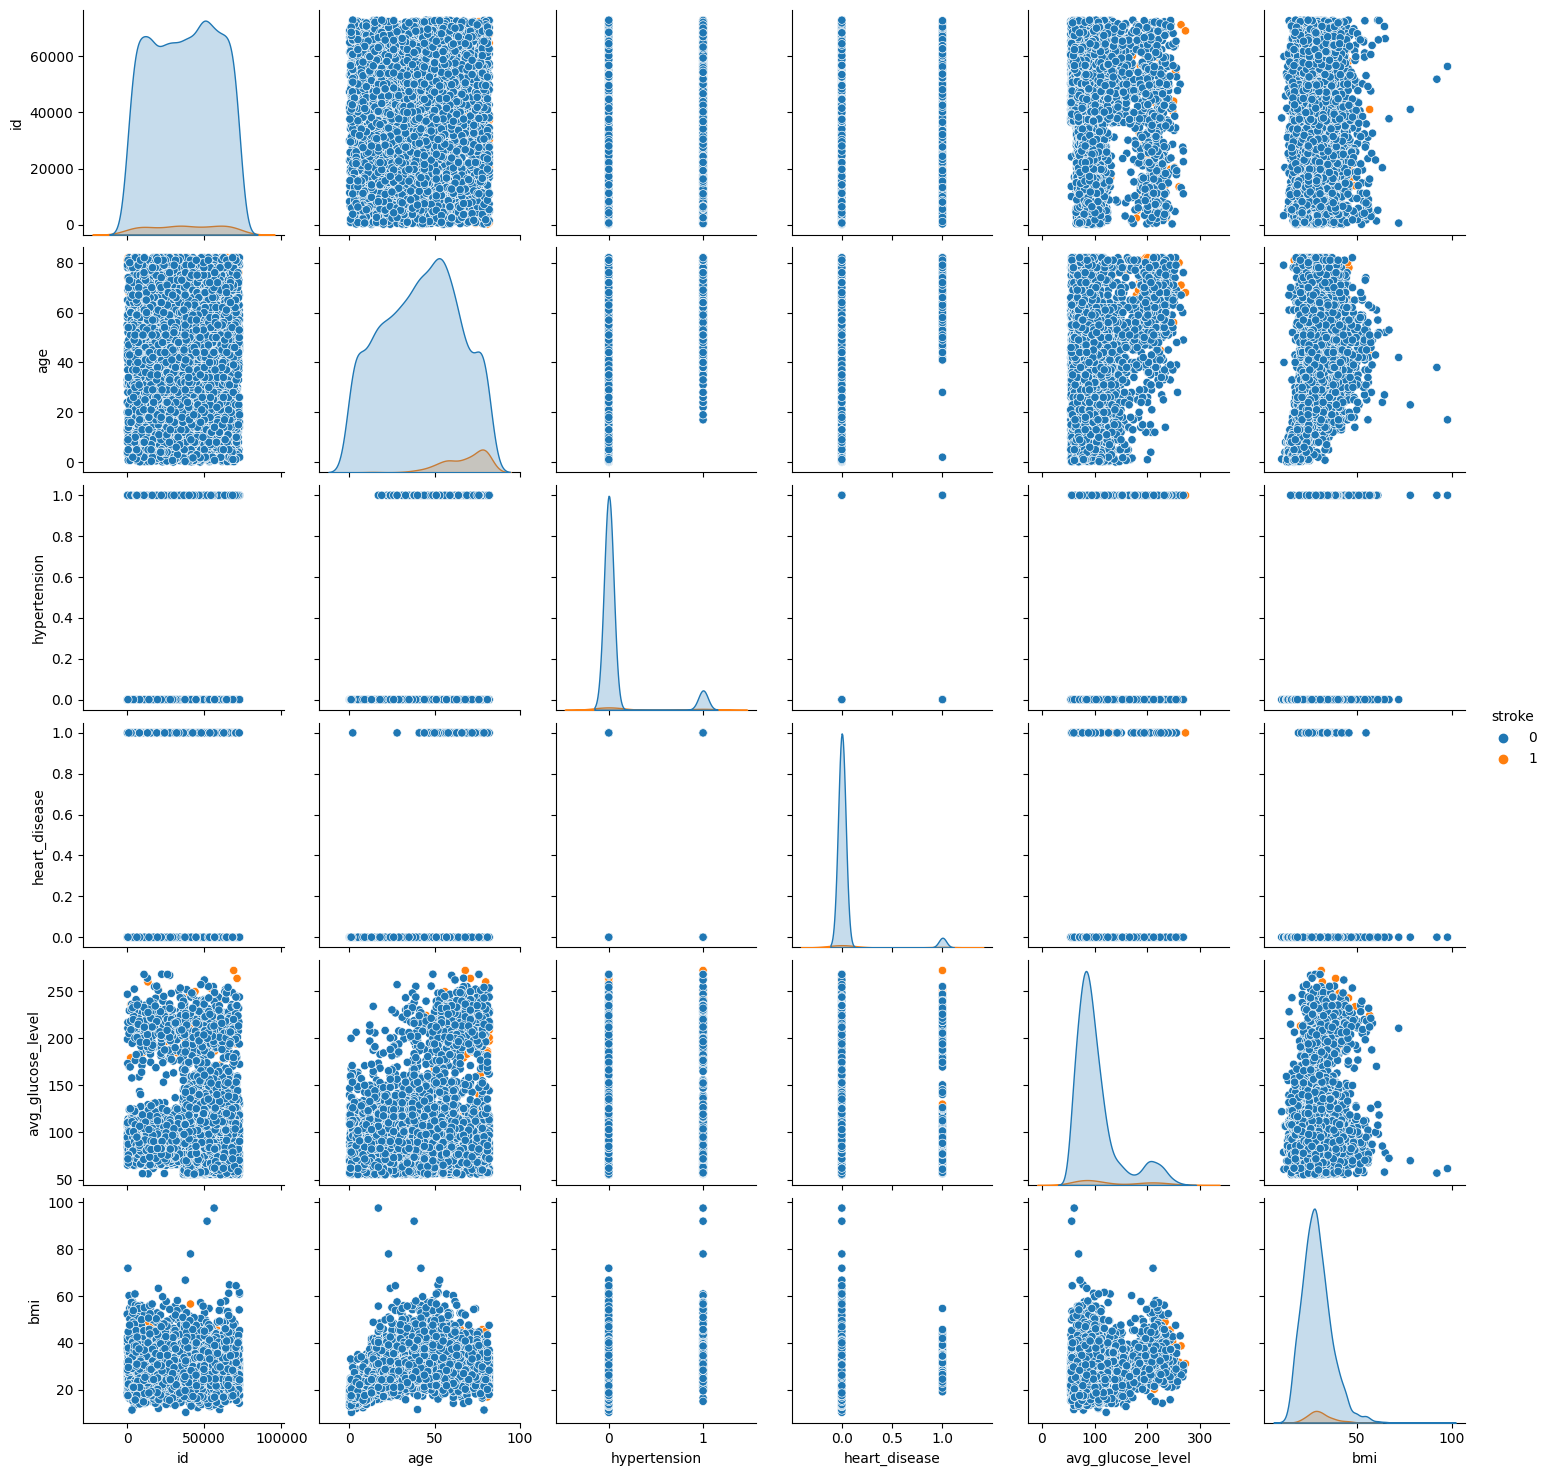

In [44]:
#lets create a lazy plot called pairplot for normal analysis of complete data
sns.pairplot(df,hue = 'stroke')

# univariate Analysis

Text(0.5, 1.02, 'Feature distribution')

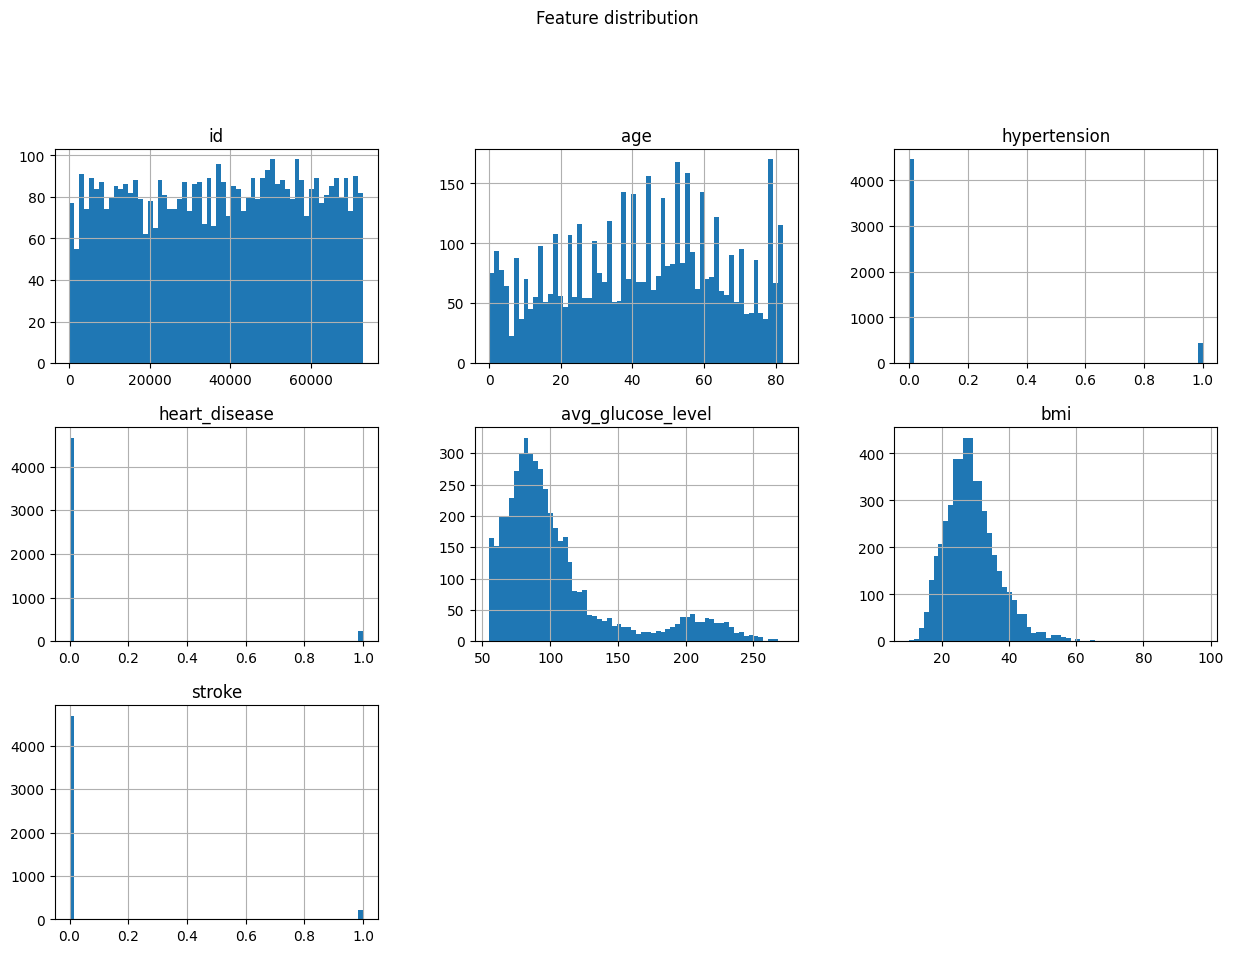

In [45]:
# df.drop('id',axis = 1,inplace = True) #feature ID is of no use
import matplotlib.pyplot as plt
#check the distribution of the dataset features
df.hist(bins = 60,figsize =(15,10))
plt.suptitle("Feature distribution",x=.5,y=1.02,ha='center',fontsize = 'large') #The suptitle() function in pyplot module of the matplotlib library is used to add a title to the figure



In [46]:
df.drop('id',axis = 1,inplace = True) #feature ID is of no use

Text(0.5, 1.02, 'Feature distribution')

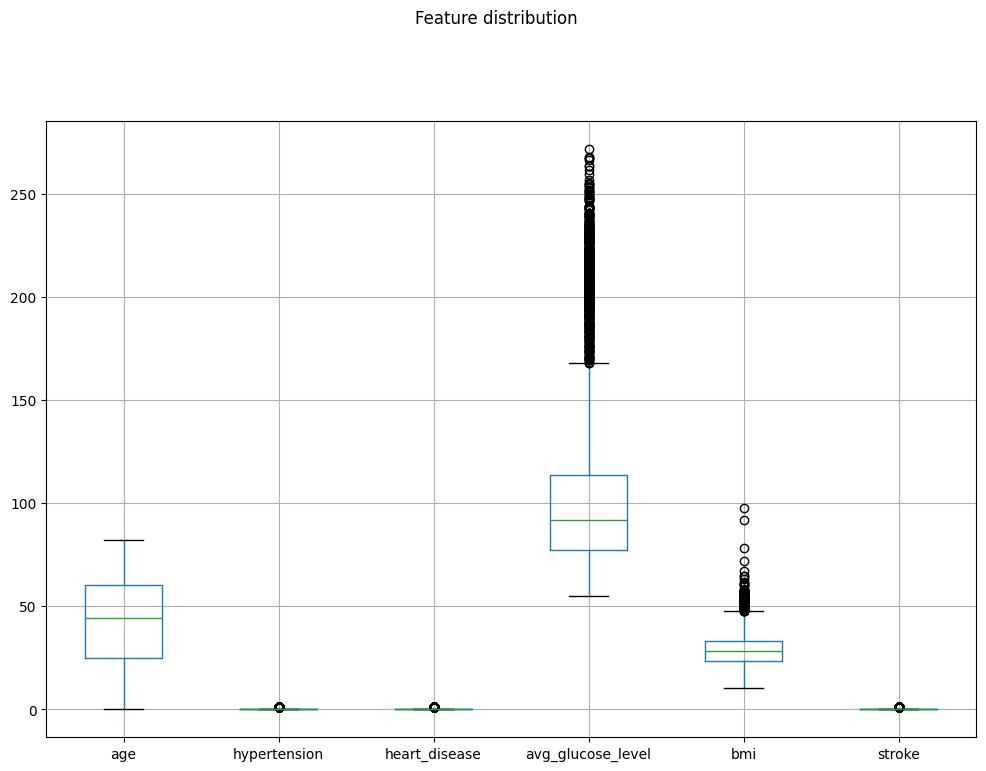

In [47]:
#check the distrubtion of dataset using bar plot
df.boxplot(figsize = (12,8))
plt.suptitle("Feature distribution",x=.5,y=1.02,ha='center',fontsize = 'large') #The suptitle() function in pyplot module of the matplotlib library is used to add a title to the figure


## in above bar plot, glucose lvl and bmi have more outliers as compared to other

([<matplotlib.patches.Wedge at 0x7bb682e430d0>,
 [Text(-0.307755600196639, 1.0560712525902818, 'female'),
  Text(0.30775560019663867, -1.0560712525902818, 'Male')],
 [Text(-0.16786669101634855, 0.5760388650492445, '59%'),
  Text(0.16786669101634835, -0.5760388650492446, '41%')])

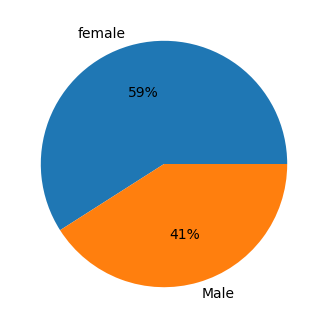

In [48]:
#list for the gender feature
gender = ['female','Male']

#make an object which stores value count of the elements in gender feature
gender_data = pd.Series(df['gender']).value_counts()

#adjust size of pie chart
plt.figure(figsize = (4,4))

#plotting pie chart
plt.pie(gender_data,labels = gender,autopct = '%.0f%%')

([<matplotlib.patches.Wedge at 0x7bb682d2e1d0>,
 [Text(-0.5080276543906456, 0.9756576768387256, 'Married'),
  Text(0.5080277457383074, -0.9756576292737397, 'Not Married')],
 [Text(-0.27710599330398844, 0.5321769146393048, '65%'),
  Text(0.2771060431299858, -0.532176888694767, '35%')])

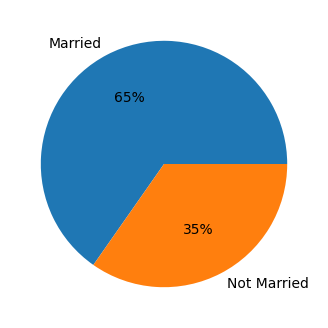

In [49]:
#list for the married feature
married = ['Married','Not Married']

#make an object which stores value count of the elements in married feature
married_data = pd.Series(df['ever_married']).value_counts()

#adjust size of pie chart
plt.figure(figsize = (4,4))

#plotting pie chart
plt.pie(married_data,labels = married,autopct = '%.0f%%')

([<matplotlib.patches.Wedge at 0x7bb682d81300>,
 [Text(-0.24849794293519883, 1.0715637042924582, 'Private'),
  Text(-0.6382191091776186, -0.8959220773485421, 'Self-Employed'),
  Text(0.33200713375555313, -1.0486997964791556, 'Children'),
  Text(0.9992078303999088, -0.4599822949500419, 'Govt. Job'),
  Text(1.0998909305275677, -0.015490027217579071, 'Never worked')],
 [Text(-0.13554433251010845, 0.5844892932504316, '57%'),
  Text(-0.3481195140968828, -0.4886847694628411, '16%'),
  Text(0.1810948002303017, -0.5720180708068121, '14%'),
  Text(0.5450224529454047, -0.25089943360911376, '13%'),
  Text(0.5999405075604914, -0.008449105755043129, '0%')])

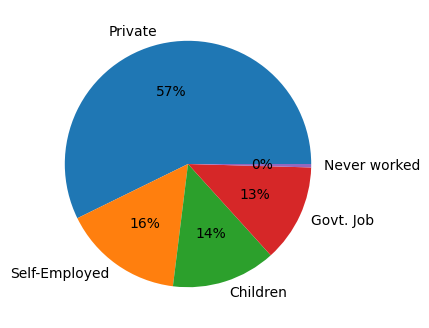

In [50]:
#list for the work_type feature
work_type = ['Private','Self-Employed','Children','Govt. Job','Never worked']

#make an object which stores value count of the elements in work_type feature
work_typ_data = pd.Series(df['work_type']).value_counts()

#adjust size of pie chart
plt.figure(figsize = (4,4))

#plotting pie chart
plt.pie(work_typ_data,labels = work_type,autopct = '%.0f%%')

([<matplotlib.patches.Wedge at 0x7bb682dd1900>,
 [Text(-0.025345515982636815, 1.099707963424642, 'Urban'),
  Text(0.025345413020546048, -1.0997079657976558, 'Rural')],
 [Text(-0.01382482689962008, 0.599840707322532, '51%'),
  Text(0.013824770738479661, -0.5998407086169031, '49%')])

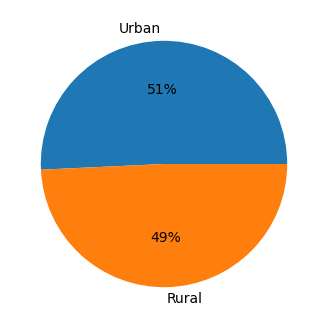

In [51]:
#list for the residence_type feature
Residence_type = ['Urban','Rural']

#make an object which stores value count of the elements in residence type feature
Residence_type_data= pd.Series(df['Residence_type']).value_counts()

#adjust size of pie chart
plt.figure(figsize = (4,4))

#plotting pie chart
plt.pie(Residence_type_data,labels =Residence_type ,autopct = '%.0f%%')

([<matplotlib.patches.Wedge at 0x7bb682c30820>,
 [Text(0.41345956848245324, 1.019338601854312, 'never smoked'),
  Text(-1.0825052746740849, -0.1954029946105854, 'Unknown'),
  Text(0.10124768212643617, -1.0953305012022738, 'formerly smoked'),
  Text(0.97985128217811, -0.49989145303146976, 'smokes')],
 [Text(0.225523400990429, 0.5560028737387156, '38%'),
  Text(-0.5904574225495007, -0.10658345160577384, '30%'),
  Text(0.055226008432601545, -0.5974530006557857, '17%'),
  Text(0.5344643357335145, -0.27266806528989257, '15%')])

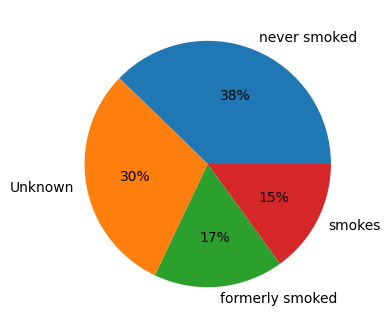

In [52]:
#list for the smoking_status feature
smoking_status = ['never smoked','Unknown','formerly smoked','smokes']

#make an object which stores value count of the elements in smoking status feature
smoking_status_data = pd.Series(df['smoking_status']).value_counts()

#adjust size of pie chart
plt.figure(figsize = (4,4))

#plotting pie chart
plt.pie(smoking_status_data,labels = smoking_status,autopct = '%.0f%%')

/tmp/ipykernel_32/653299563.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'],kde = True)
/tmp/ipykernel_32/653299563.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['avg_glucose_level'],kde = True)
/tmp/ipykernel_32/653299563.py:13: UserWarning: 

`distplot` is a deprecat

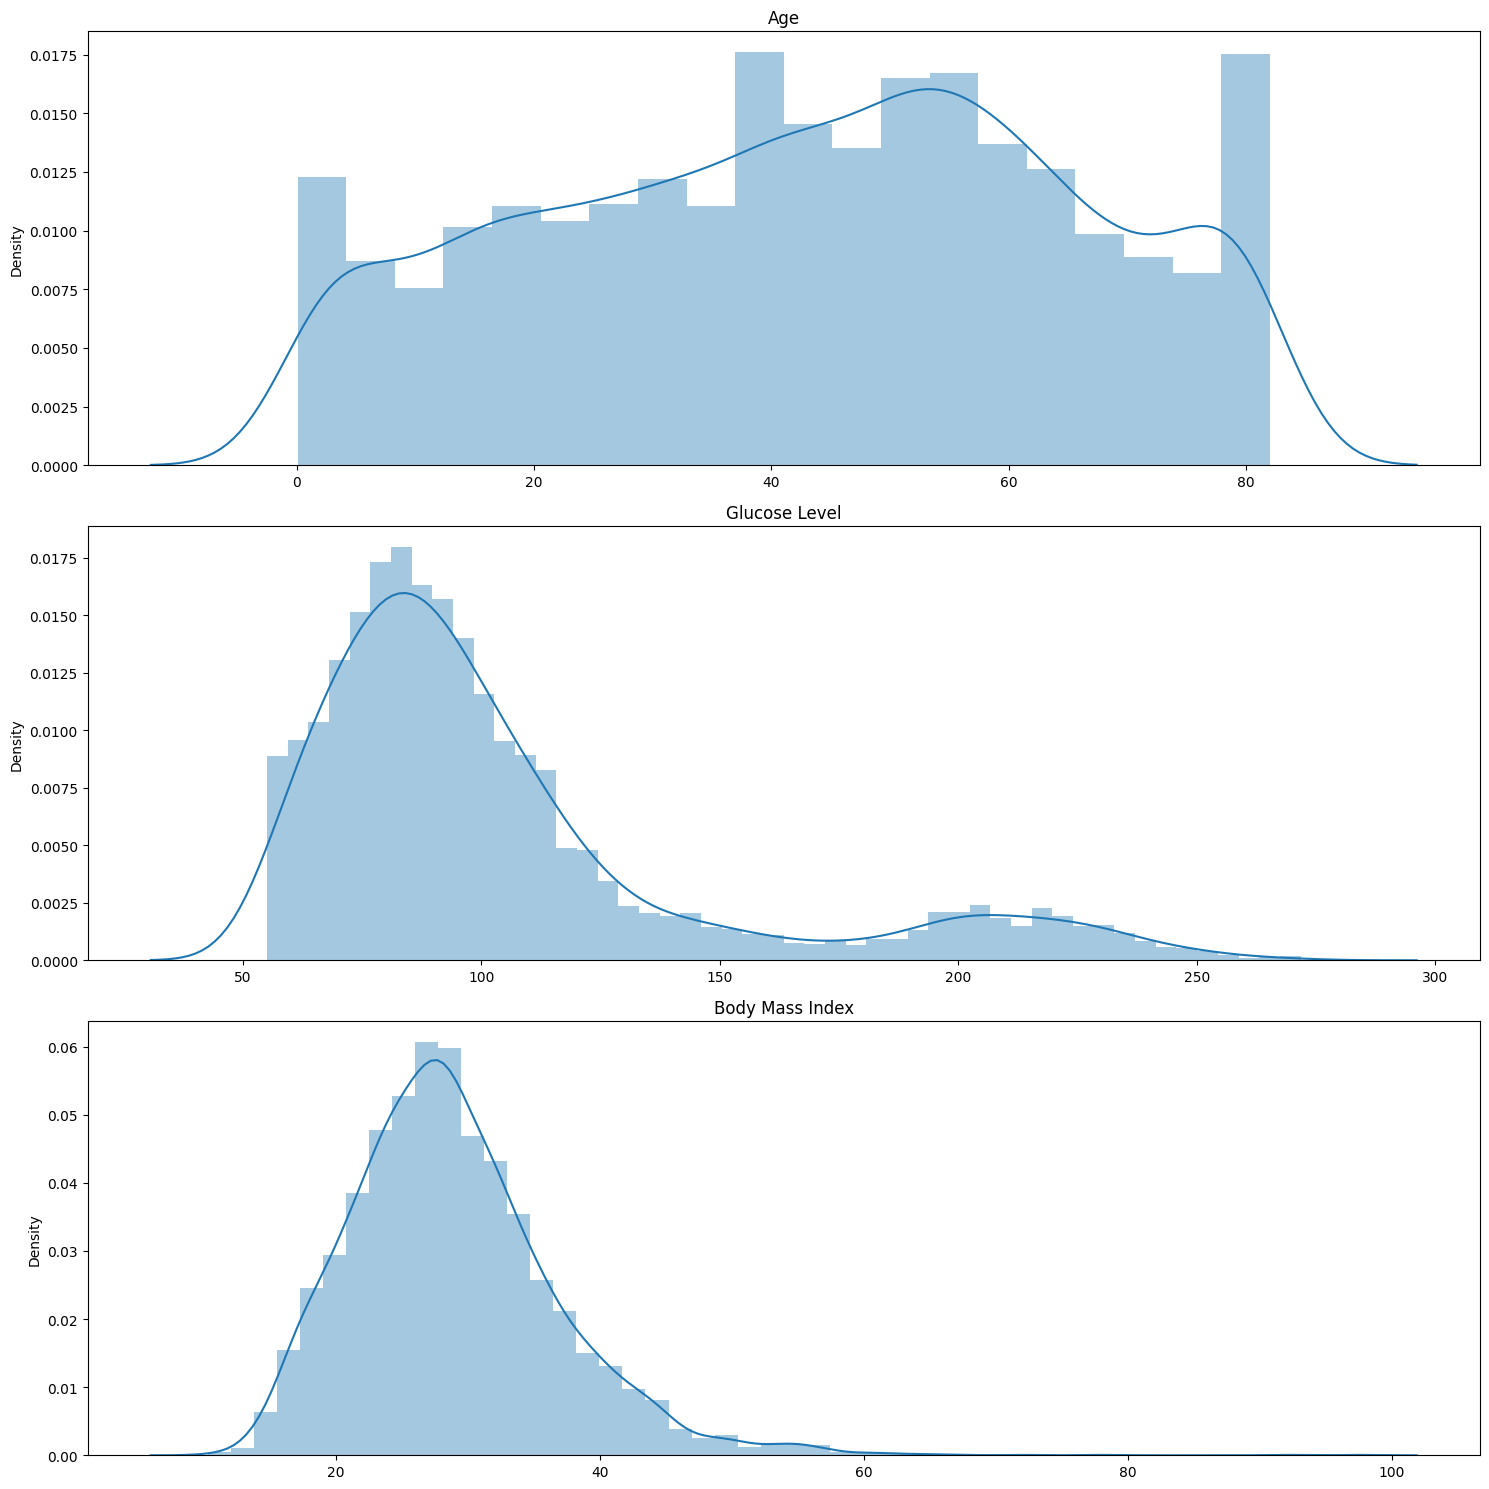

In [53]:
#lets see the distribution of real numbers columns with the help of kde plot
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.distplot(x=df['age'],kde = True)
plt.title('Age')

plt.subplot(3,1,2)
sns.distplot(x=df['avg_glucose_level'],kde = True)
plt.title('Glucose Level')

plt.subplot(3,1,3)
sns.distplot(x=df['bmi'],kde = True)
plt.title('Body Mass Index')

plt.tight_layout()

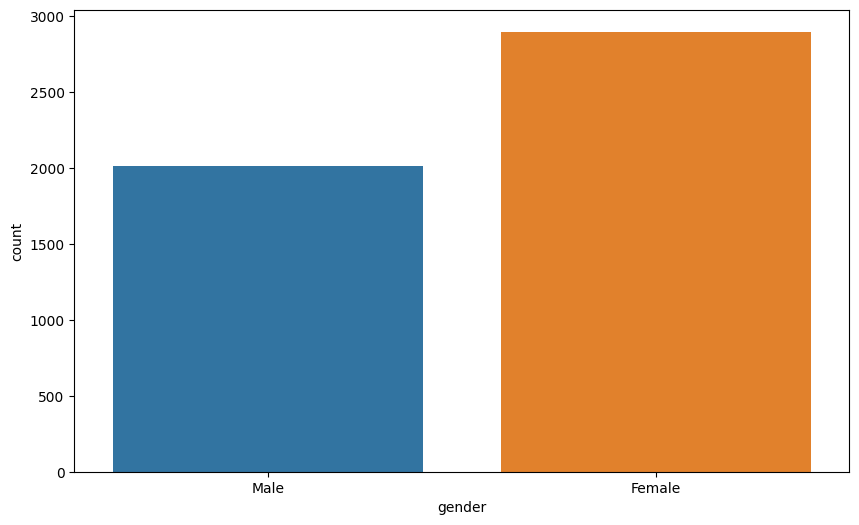

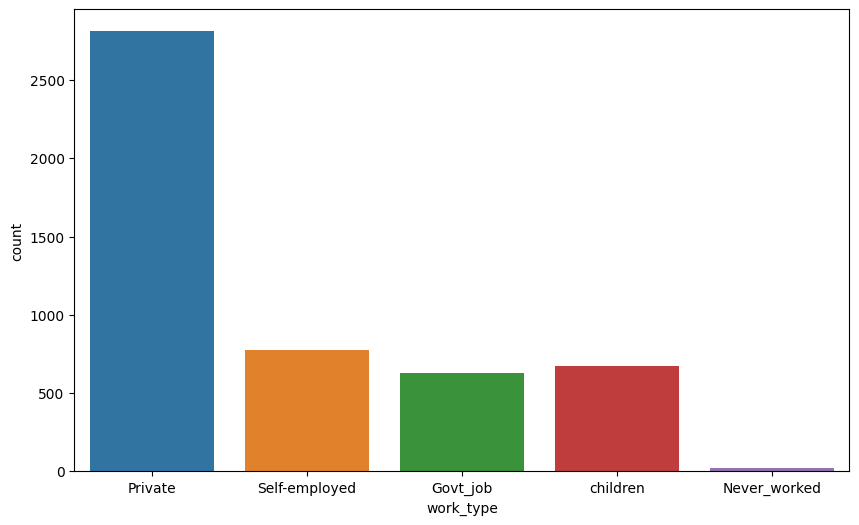

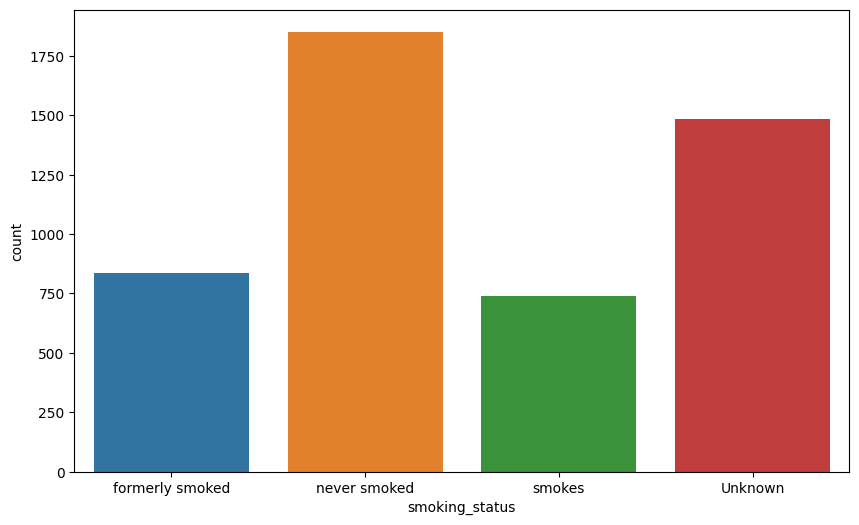

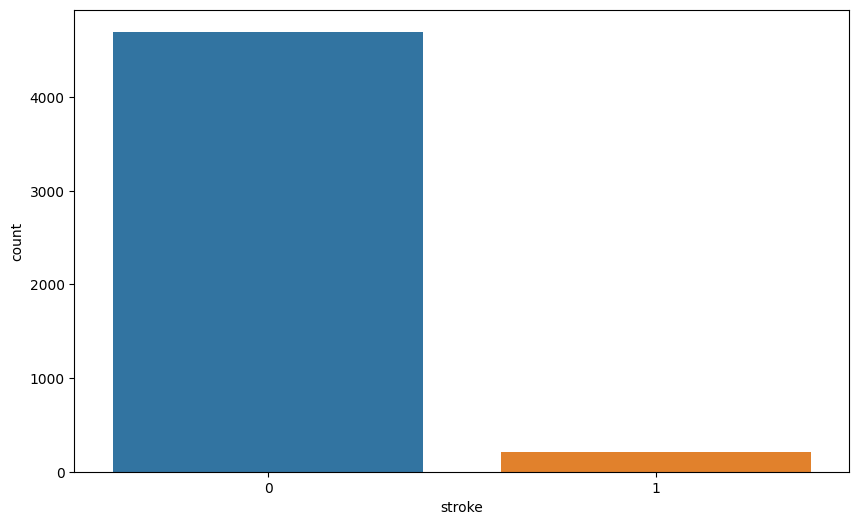

In [54]:
#create a countplot for gender column
# plt.figure(figsize = (10,6))
# sns.countplot(x='gender',data= df)

countplotlist = ['gender','work_type','smoking_status','stroke']

for feature in countplotlist:
    plt.figure(figsize = (10,6))
    sns.countplot(data = df, x=feature)

#Clearly its a imbalance dataset means most numbers of patients are not suffering from
from stroke(4500+) and minimun number of patients suffer from stroke
around (200-300).so this will effect on our machine learning model
future.Hence, we will just continue this project for leaning purpose
although our model perform worse for real time data and it will 
perform wrong predictions.

o->false
1->true

# Bivariate Analysis

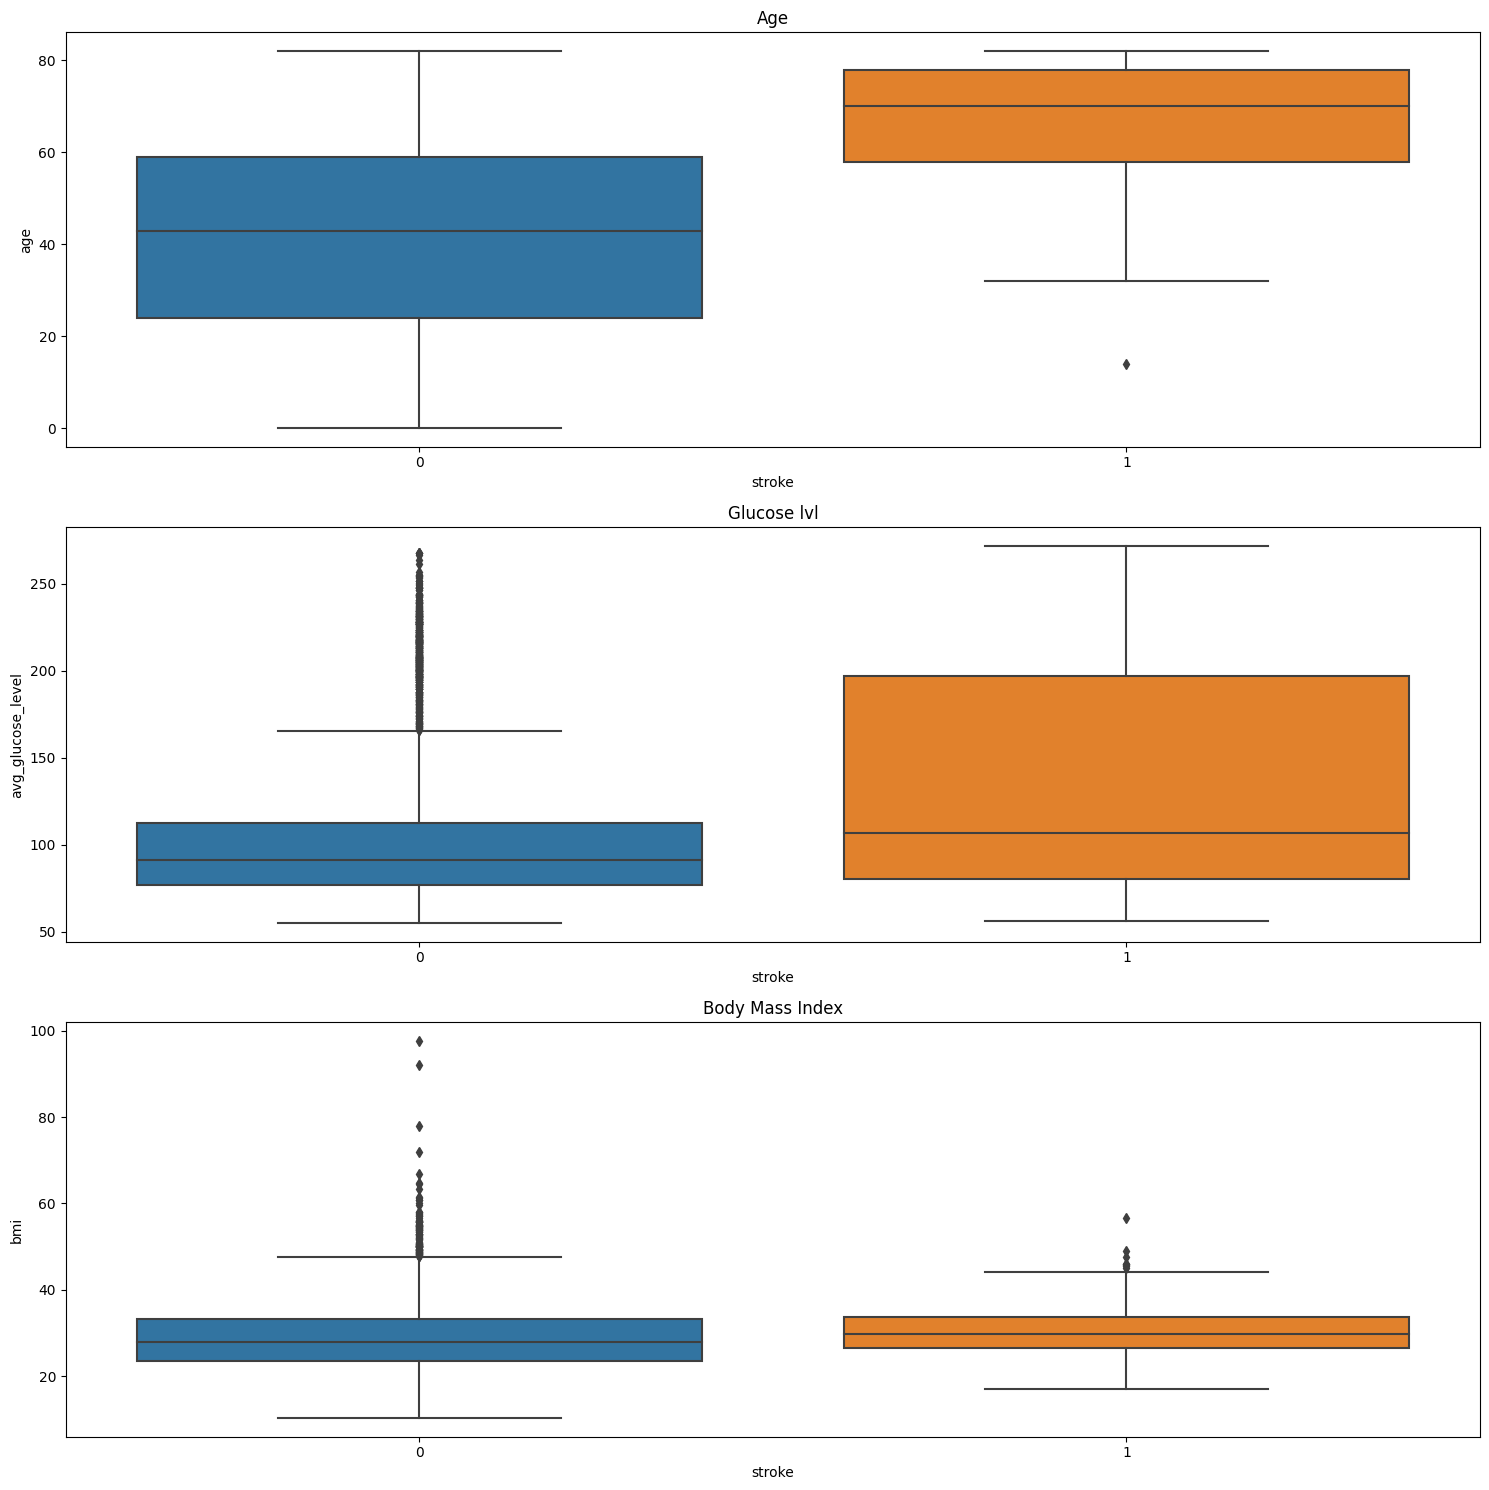

In [55]:
#lets plot the boxplot for all numeric continous columns wrt target feature
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.boxplot(x=df['stroke'],y=df['age'],data = df)
plt.title('Age')

plt.subplot(3,1,2)
sns.boxplot(x=df['stroke'],y=df['avg_glucose_level'],data = df)
plt.title('Glucose lvl')

plt.subplot(3,1,3)
sns.boxplot(x=df['stroke'],y=df['bmi'],data = df)
plt.title('Body Mass Index')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation plot of all features')

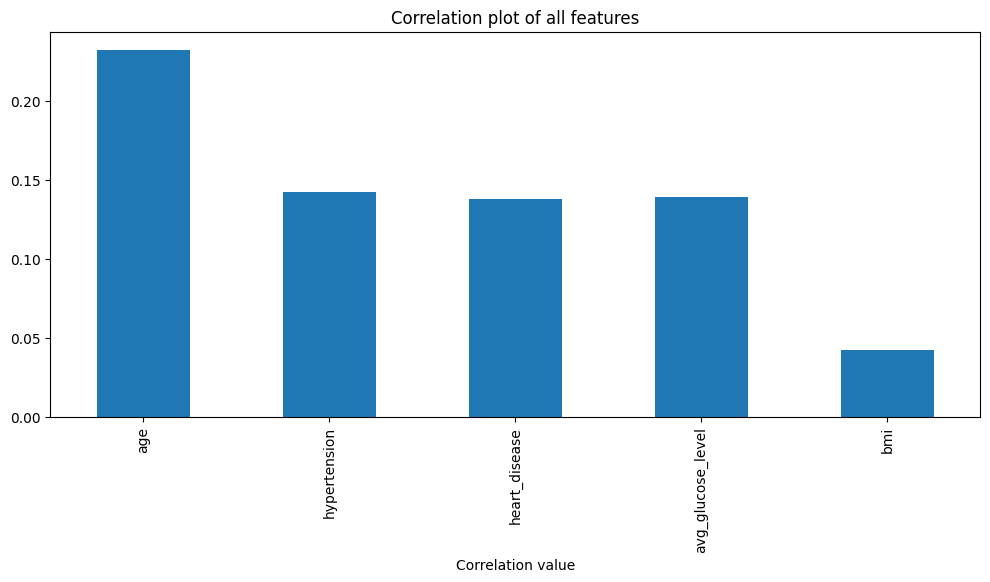

In [56]:
#checking all the features correlation wrt target variables

#adjust the size of the plot
plt.figure(figsize=(12,5))

#plot correlation
df.corr(numeric_only= True)['stroke'][:-1].plot(kind='bar')

#create a 'x label'
plt.xlabel('Feature')

#create a 'y label'
plt.xlabel('Correlation value')

#create a title for the plot
plt.title('Correlation plot of all features')

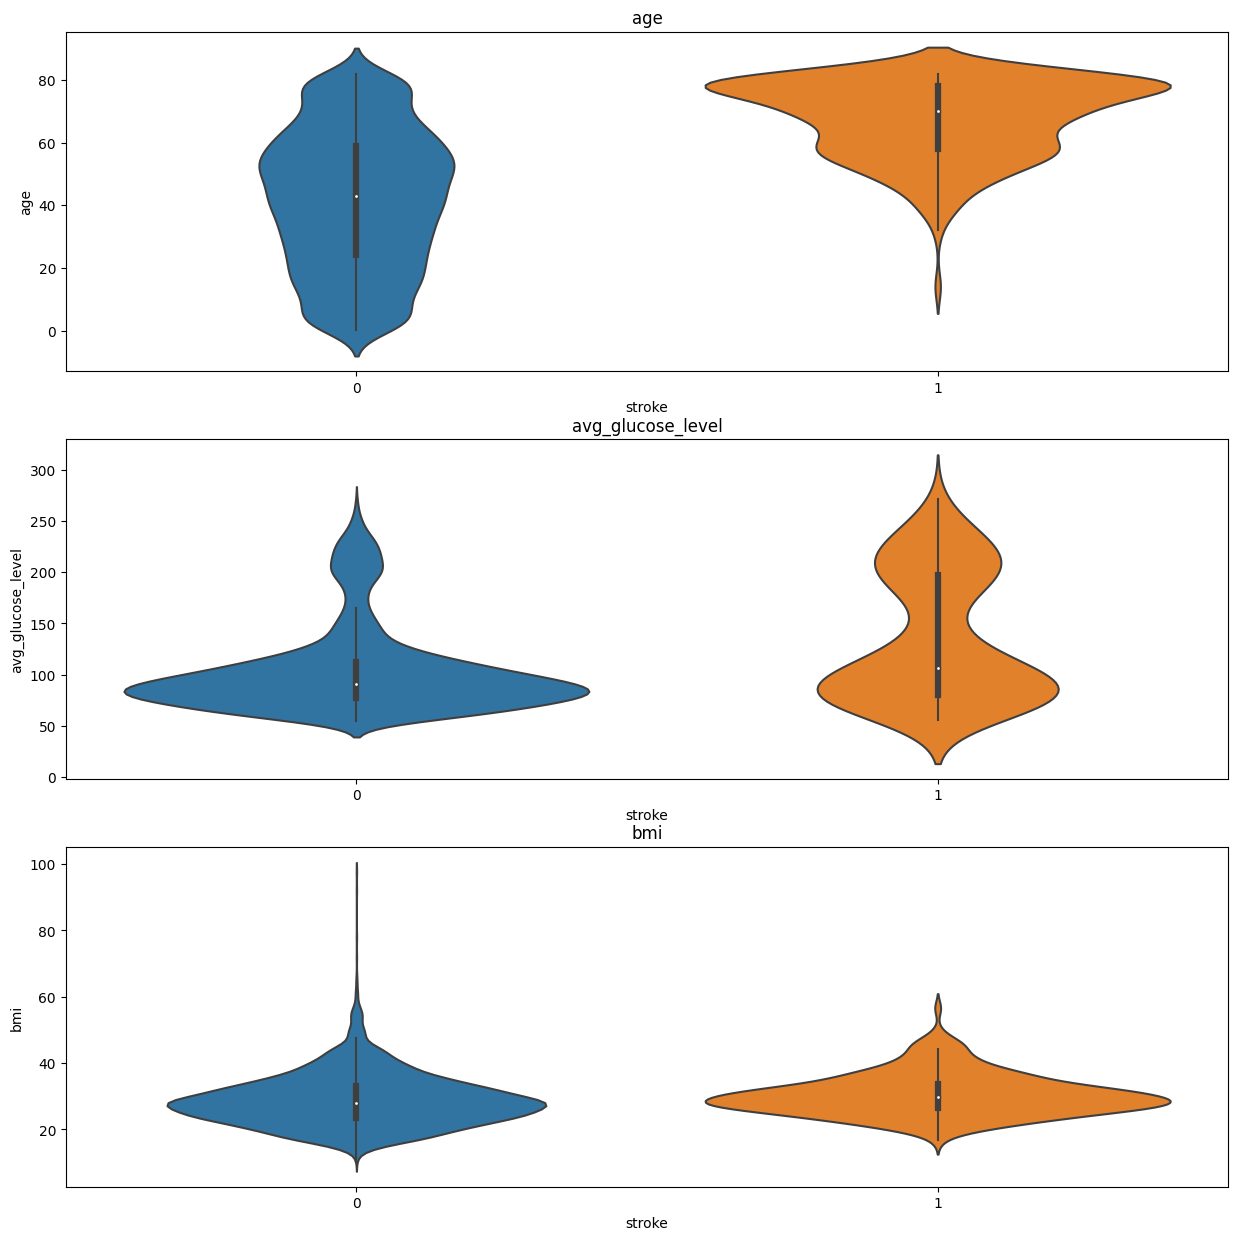

In [57]:
#lets plot the violinplot for all numeric continous columns wrt targer feature
plt.figure(figsize = (15,15))

violinplotlist = ['age','avg_glucose_level','bmi']
i=1
for feature in violinplotlist:
    plt.subplot(3,1,i)
    sns.violinplot(x=df['stroke'],y=df[feature],data = df) #A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.
    plt.title(feature)
    i+=1


# print(violinplotlist['age'].index)




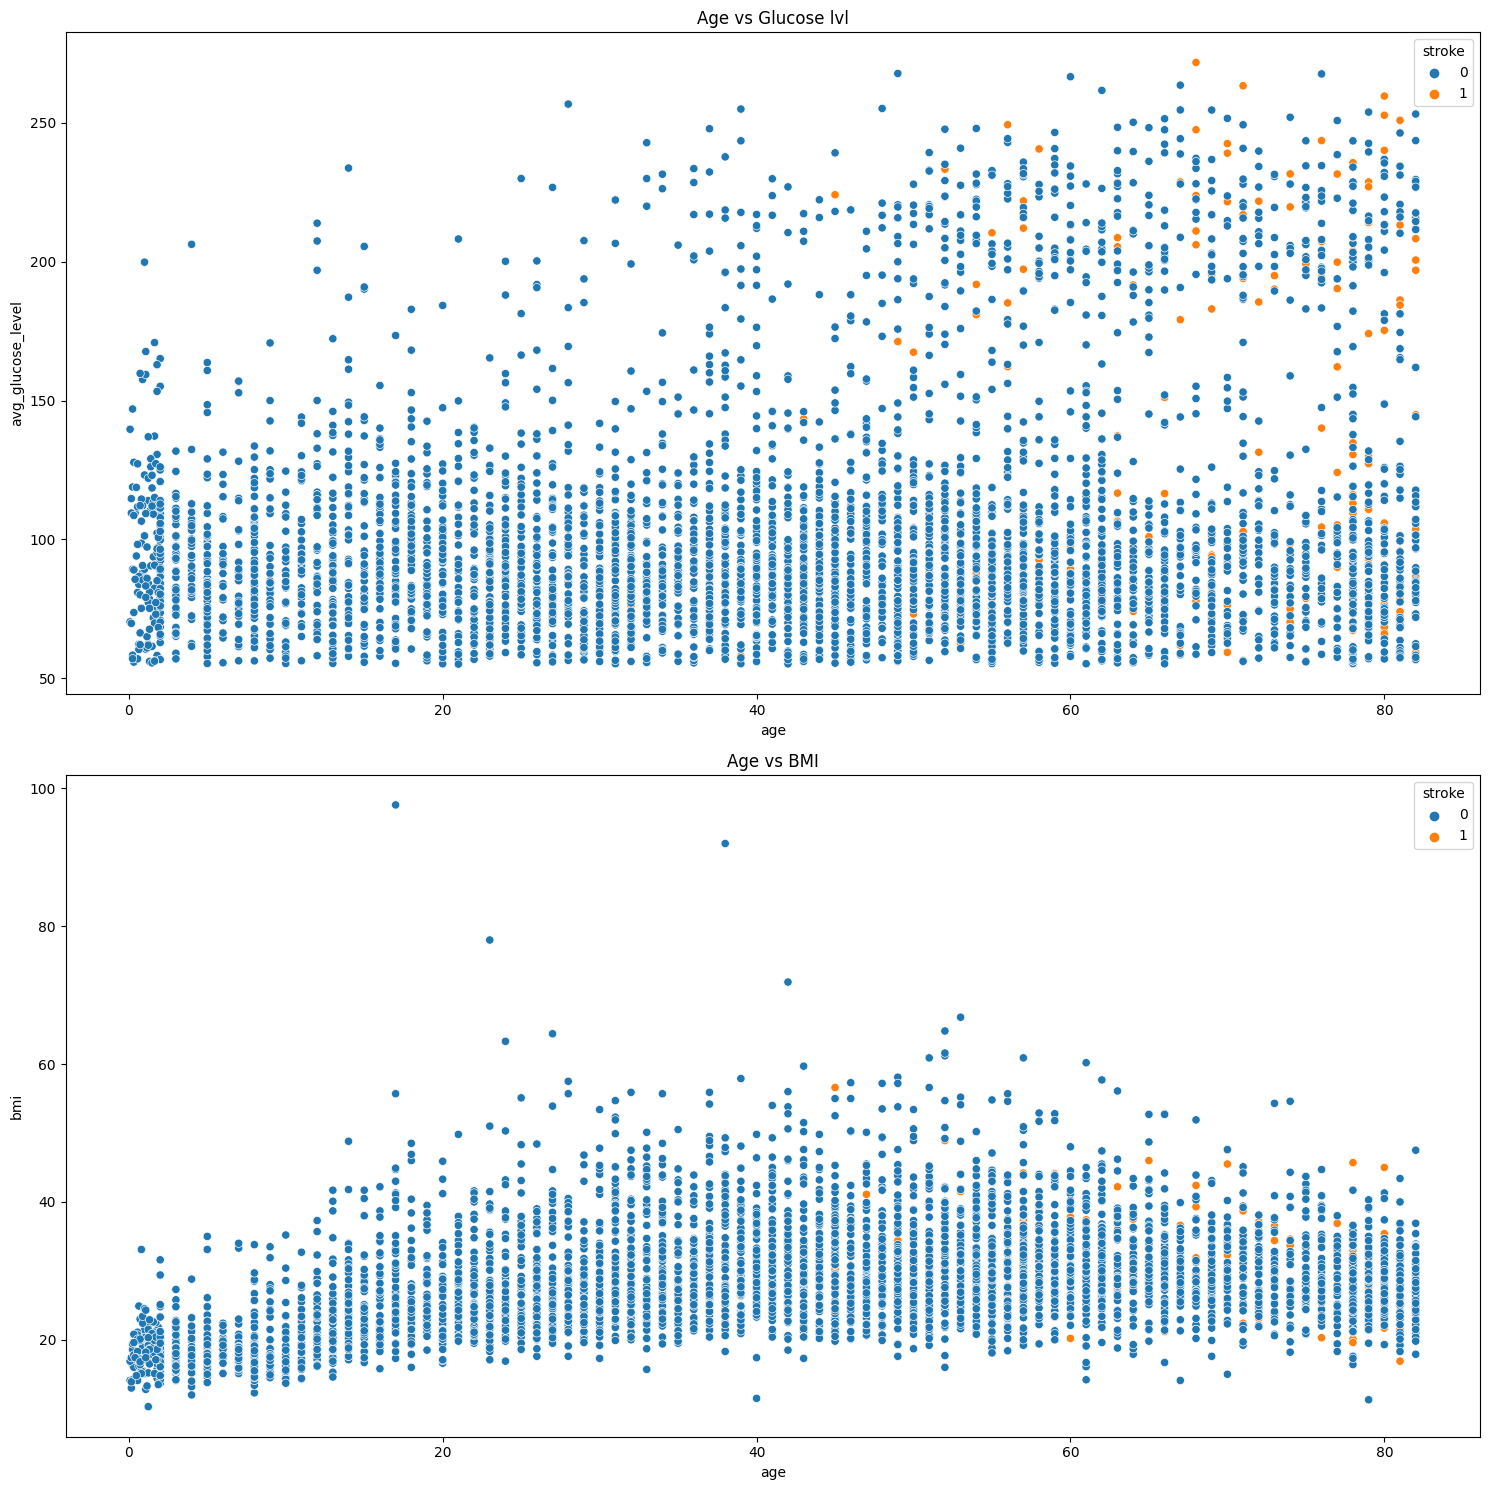

In [58]:
# check the relation b/w 'Age' vs 'Glucose_level' and 
# 'Age' vs 'BMI'

plt.figure(figsize = (15,15))

plt.subplot(2,1,1)
sns.scatterplot(x=df['age'],y=df['avg_glucose_level'],hue = 'stroke',data =df)
plt.title('Age vs Glucose lvl')

plt.subplot(2,1,2)
sns.scatterplot(x=df['age'],y=df['bmi'],hue = 'stroke',data =df)
plt.title('Age vs BMI')

plt.tight_layout()

Text(0.5, 1.0, 'BMI vs Glucose lvl')

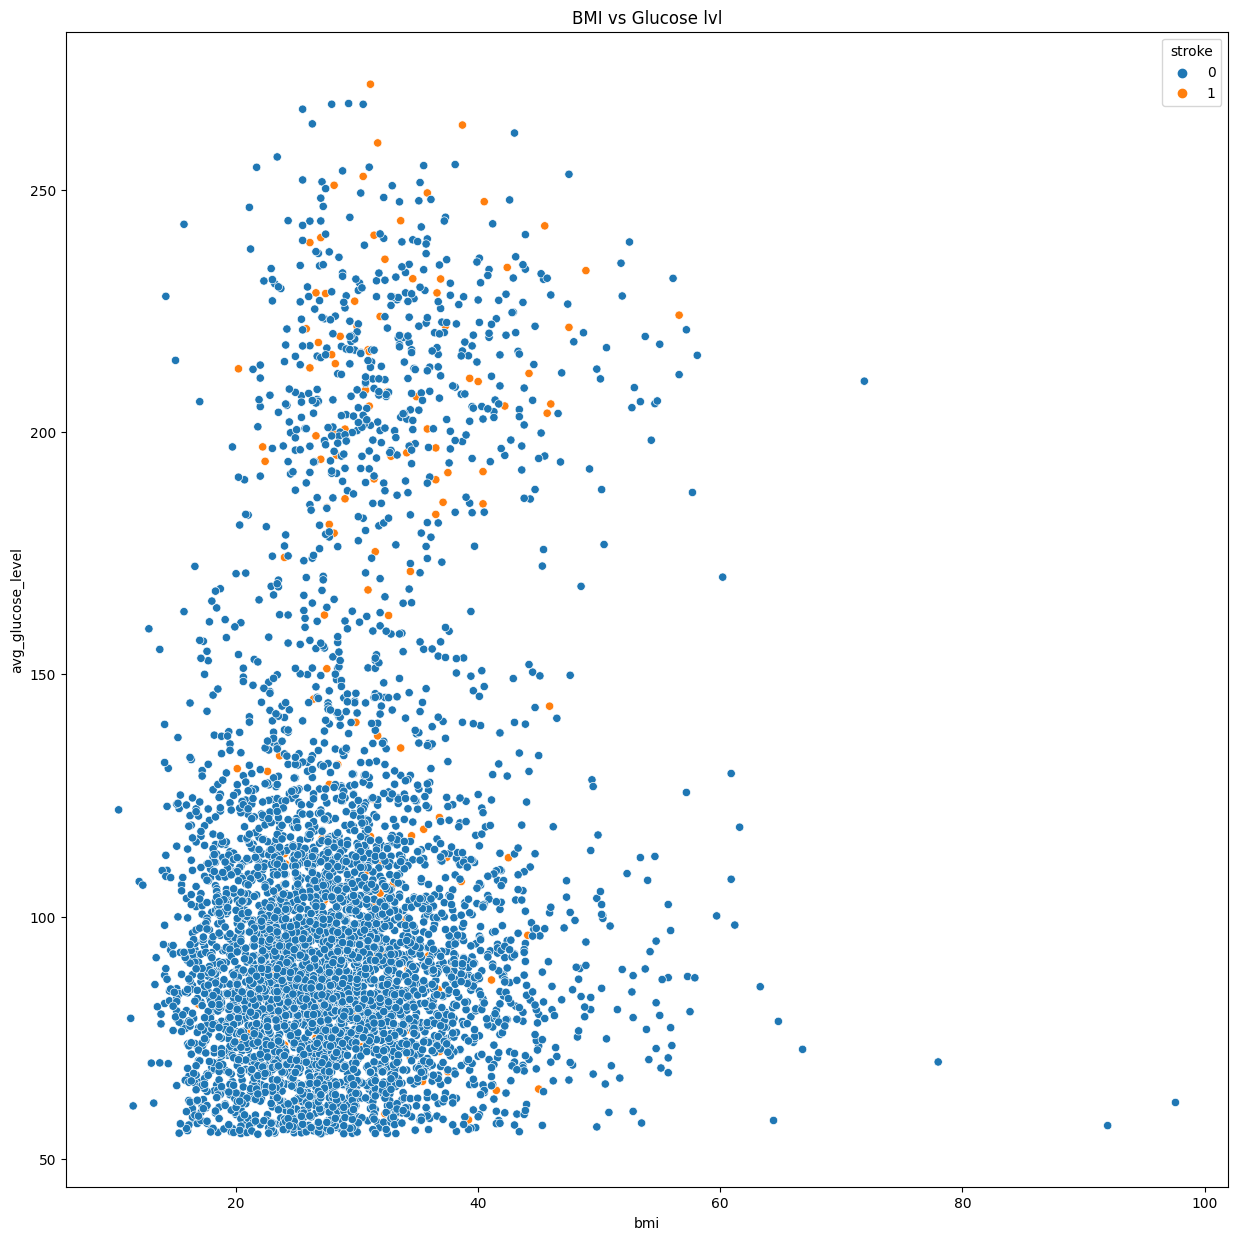

In [59]:
# check the relation b/w 'BMI' vs 'Glucose_level' with scatterplot 
plt.figure(figsize = (15,15))

sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'],hue = 'stroke',data =df)
plt.title('BMI vs Glucose lvl')

# Multi Variate Analysis

In [60]:
#create a heatmap to visualize the correlation bw all features

#create a variable for correlation
# df_corr = df.corr()

# # plot heatmap
# sns.heatmap(df_corr,annot = True,linecolor ='white',linewidths = .2)

# #set a title
# plt.title('Heatmap of dataframe(without label encoding)')

## above heatmap plotting requires one hot encoding for categorical feature

# Data Preprocessing 2(Label Encoding)

In [61]:
# import sklearn function 'LabelEncoder' for converting values into numeric labels
from sklearn.preprocessing import LabelEncoder

#make a variable for LabelEncoder function
label_encoder = LabelEncoder()

In [62]:
#creating a list for categorical features

catList = ['gender','ever_married','work_type','Residence_type','smoking_status']

for feature in catList:
    df[feature] = label_encoder.fit_transform(df[feature])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.1 KB


Text(0.5, 1.0, 'Heatmap of dataframe')

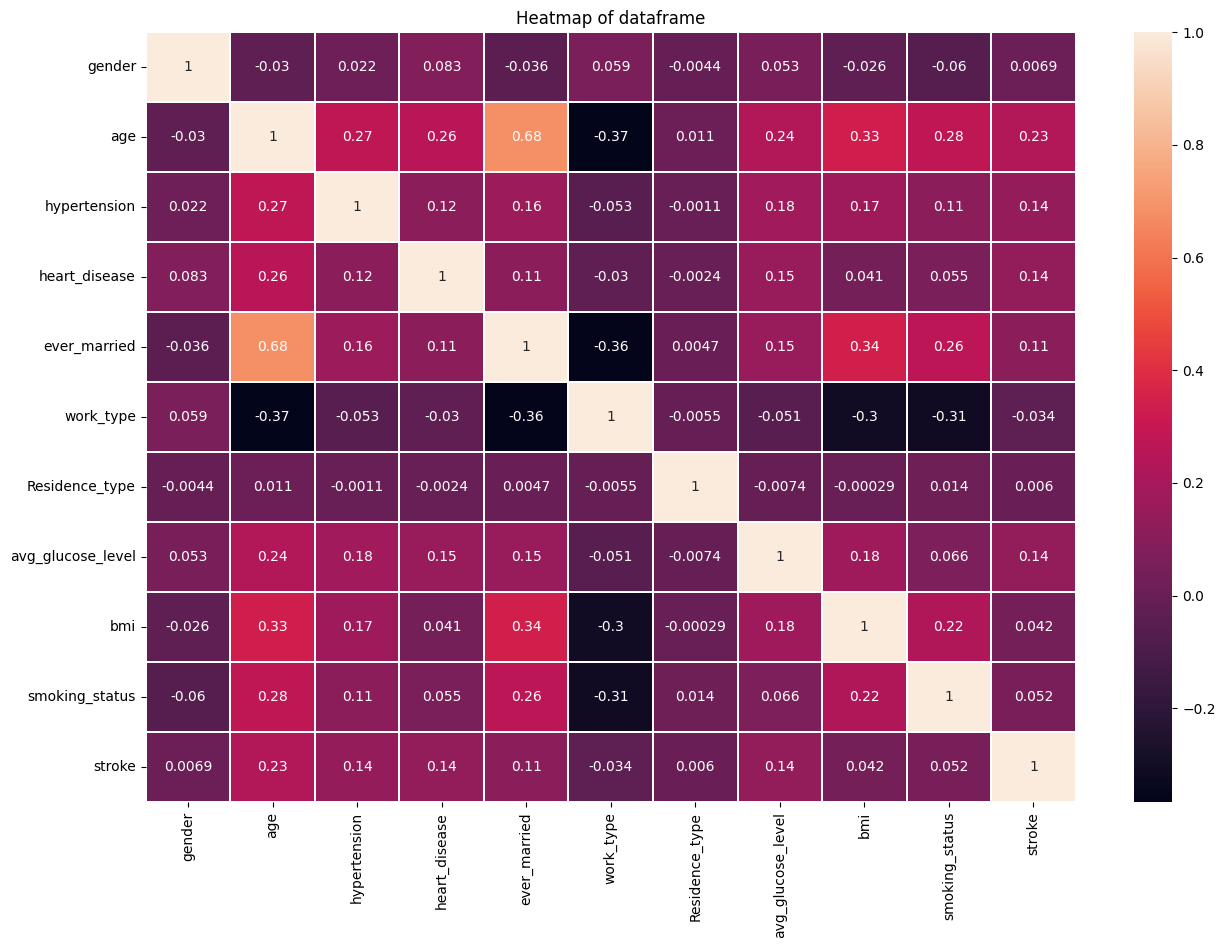

In [64]:
# create a heatmap to visualize the correlation bw all features

plt.figure(figsize = (15,10))
# create a variable for correlation
df_corr = df.corr()

# plot heatmap
sns.heatmap(df_corr,annot = True,linecolor ='white',linewidths = .2)

#set a title
plt.title('Heatmap of dataframe')

Text(0.5, 1.0, 'Correlation plot of all features')

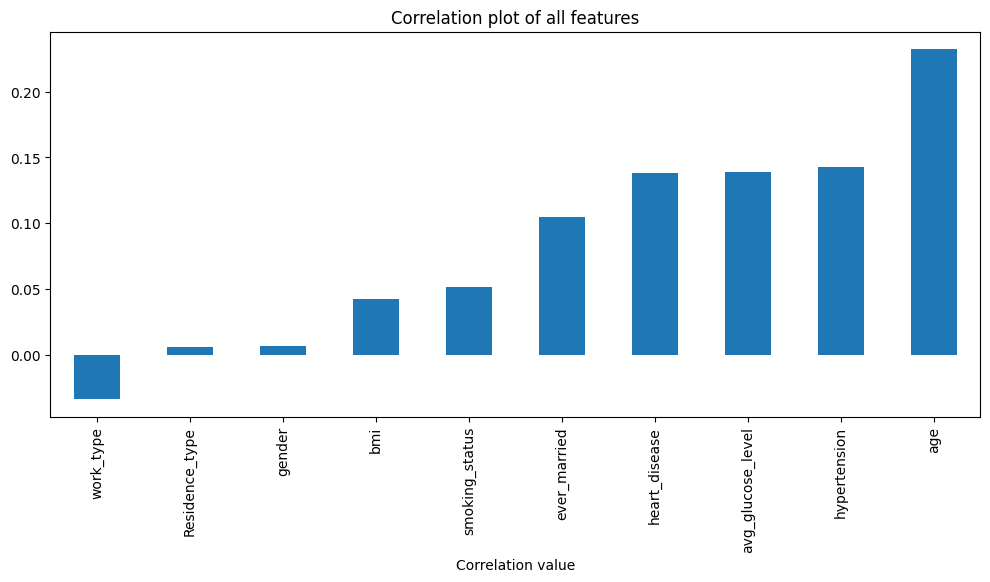

In [65]:
#checking all the features correlation wrt target variables

#adjust the size of the plot
plt.figure(figsize=(12,5))

#plot correlation
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

#create a 'x label'
plt.xlabel('Features')

#create a 'y label'
plt.xlabel('Correlation value')

#create a title for the plot
plt.title('Correlation plot of all features')

# Machine Learning Model

## Import all libraries used to build model

In [66]:
from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #support vector machine

 
from sklearn.naive_bayes import MultinomialNB #naive bayes classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import shap #SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Splitting of data

In [67]:
# splitting data into dependant and independent variables

#independent variables
X = df.drop('stroke',axis=1)

#dependent variable
Y = df['stroke']


<Axes: xlabel='stroke', ylabel='count'>

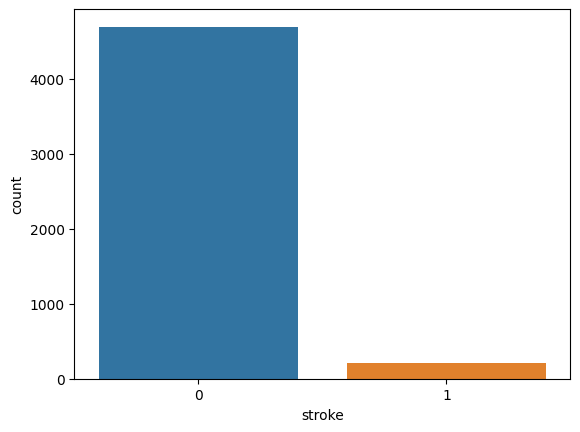

In [68]:
sns.countplot(x=Y,data = df)
#shows stroke feature is heavily imbalances as most of the data is 0-> not stroke

In [69]:
# using sampling technique to balance the classes

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state = 42)

X_res, Y_res = ros.fit_resample(X,Y)

print('original dataset shape', Counter(Y))
print('resample dataset shape', Counter(Y_res))


original dataset shape Counter({0: 4699, 1: 209})
resample dataset shape Counter({1: 4699, 0: 4699})


<Axes: xlabel='stroke', ylabel='count'>

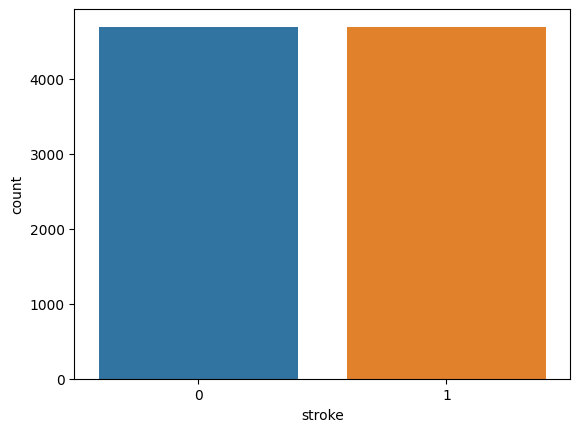

In [70]:
sns.countplot(x=Y_res,data = df)

In [71]:
#splitting the data

x_train,x_test,y_train,y_test = tts(X_res,Y_res,test_size = .3)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6578, 10), (2820, 10), (6578,), (2820,))

## Scaling train and Test data

In [73]:
scaler = MinMaxScaler()

In [74]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## making objects of ml algo

In [75]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 200)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors = 5)
nb = MultinomialNB()

# prediction and Accuracy check for all algorithm

In [76]:
#creating a list of all algortihms
ml_names = ['Logistic Reg','Decision Tree','Random Forest','SVM',
           'K Nearest Neighbor','Naive Bayes']

# creating a list of all used ml algo objects
ml_object = [lr,dtree,rfc,svm,knn,nb]

# print(type(ml_list))
# print(type(ml_object))

print('Accuracy of all  algorithms \n')

for i,j in zip(ml_names,ml_object):          #zip()-> n-length tuples can be pass
    
    j.fit(x_train,y_train)    #training all algo
    
    pred = j.predict(x_test) #predicting on each algo

    print(i," : ", round((accuracy_score(y_test,pred)*100),2) )  #prinitng accuray


Accuracy of all  algorithms 

Logistic Reg  :  76.91
Decision Tree  :  97.34
Random Forest  :  99.01
SVM  :  80.89
K Nearest Neighbor  :  92.38
Naive Bayes  :  67.02


# Log loss Check for all Algorithm

In [77]:
# #creating a list of all algortihms
# ml_names = ['Logistic Reg','Decision Tree','Random Forest','SVM',
#            'K Nearest Neighbor','Naive Bayes']

# # creating a list of all used ml algo objects
# ml_object = [lr,dtree,rfc,svm,knn,nb]

# # print(type(ml_list))
# # print(type(ml_object))

print('Log loss of all  algorithms \n')

for i,j in zip(ml_names,ml_object):          #zip()-> n-length tuples can be pass
    
    j.fit(x_train,y_train)    #training all algo
    
    pred = j.predict(x_test) #predicting on each algo

    print(i," : ", (round(log_loss(y_test,pred),2)) )  #prinitng logg loss




Log loss of all  algorithms 

Logistic Reg  :  8.32
Decision Tree  :  0.91
Random Forest  :  0.42
SVM  :  6.89
K Nearest Neighbor  :  2.75
Naive Bayes  :  11.89


In [78]:
#we will work with highest 3 accuracy which work amazing 
# 1. Random Forest
# 2. Decision Tree
# 3. K nearest neighbor 


# Evaluation of selected algorithms

In [79]:
selected_algo = ['Random forest', 'Decision tree', 'k nearest neighbor']
ml_selected_object = [rfc,dtree,knn]

for i,j in zip(selected_algo,ml_selected_object):
    print(i,"Evaluation:\n")
    
    j.fit(x_train,y_train)
    
    pred = j.predict(x_test)
    
    print(i,'Classfication Report:')
    print(classification_report(y_test,pred),'\n')
    
    print(i,'confusion Matrix:')
    print(confusion_matrix(y_test,pred),'\n')
    print('='*75)
    

Random forest Evaluation:

Random forest Classfication Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1432
           1       0.98      1.00      0.99      1388

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820
 

Random forest confusion Matrix:
[[1400   32]
 [   0 1388]] 

Decision tree Evaluation:

Decision tree Classfication Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1432
           1       0.95      1.00      0.98      1388

    accuracy                           0.97      2820
   macro avg       0.98      0.98      0.97      2820
weighted avg       0.98      0.97      0.97      2820
 

Decision tree confusion Matrix:
[[1361   71]
 [   0 1388]] 

k nearest neighbor Evaluation:

k nearest neighbor Classfication Report:
              precisi

# Random Forest

In [80]:
# performing Hyperparameter tuning for more accurate perforamance

#Define a dictionary of hyperparameters and thier possible values
param_grid = {
    'n_estimators' : [100,200,300], #no of tress in forest
    'max_depth' : [10,20,30],       # max depth of individual tree
    'min_samples_split': [2,5,10], #min. samples rqd to split an internal node
    'min_samples_leaf':[1,2,4]   #min samples rqd to be at a leaf node
}

#create a GridSearchCV object
grid_search = GridSearchCV(estimator = rfc,
                          param_grid=param_grid,
                          cv=5,
                          scoring='accuracy')

#fit the grid search to your training data
grid_search.fit(x_train,y_train)

#get the best hypeparameters
best_params = grid_search.best_params_
print('Best hyperparameterss: ',best_params)

#get the best model
best_rfc_model = grid_search.best_estimator_

#make prediction with the best model
rfc_pred = best_rfc_model.predict(x_test)



Best hyperparameterss:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Best hyperparameterss:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Text(0.5, 1.0, 'confusion matrix for Random, forest')

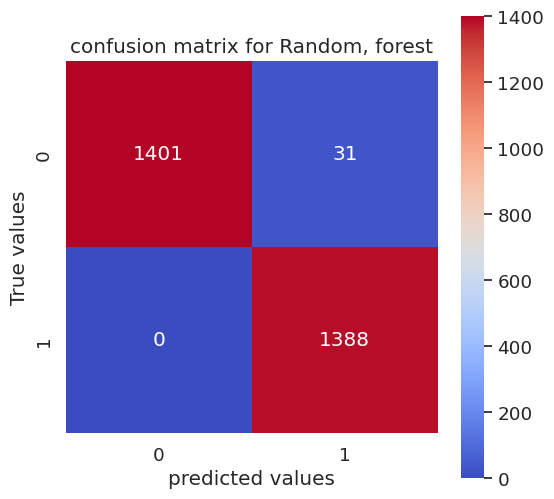

In [81]:
#making confusion matrix
cm=confusion_matrix(y_test,rfc_pred)

#adjust the size of the cm
plt.figure(figsize = (6,6))
sns.set(font_scale = 1.2)

#create a heatmap which show the cm of the decision tree model
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',square=True)

plt.xlabel('predicted values')
plt.ylabel('True values')
plt.title('confusion matrix for Random, forest')

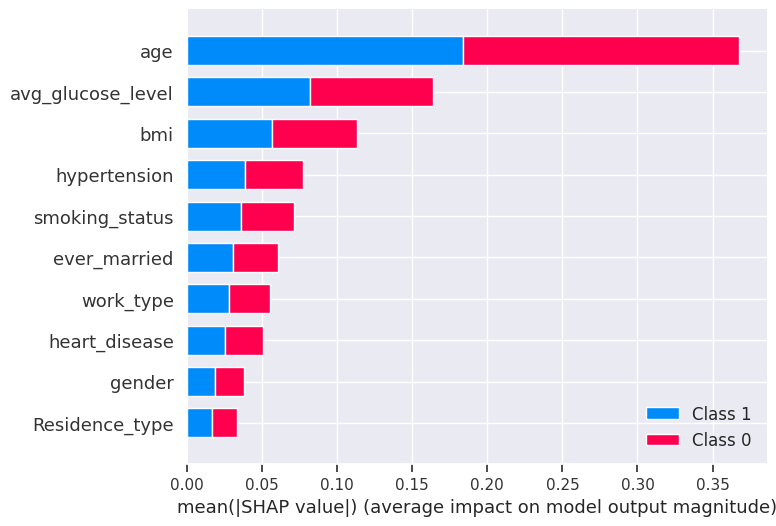

In [82]:
#shap plot for the random forest model.
explainer = shap.TreeExplainer(rfc) 
shap_values  = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,feature_names = X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


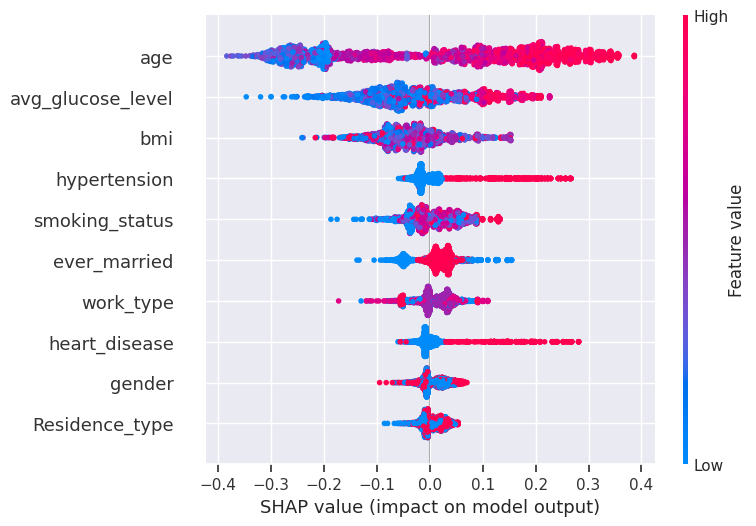

In [83]:
shap.summary_plot(shap_values[1],x_test,feature_names=X.columns)

In [84]:
# #ROC and AUC score for the random forest model
# rfc_pred_prob = rfc.predict_log_proba(x_test)[:][:,1]

# # rfc_actual_predict = pd.concat([(pd.DataFrame(np.array(y_test),columns=['y_actual'],pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])])
# rfc_actual_predict = pd.DataFrame({'y actual': y_test, 'y pred prob': rfc_pred_prob})

# rfc_actual_predict.index = y_test.index

# fpr,tpr,tr=roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y predict prob '])
# auc=roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y predict prob'])

# plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
# plt.plot(fpr,fpr, linestyle=' -- ')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Random Forest')
# plt.legend()


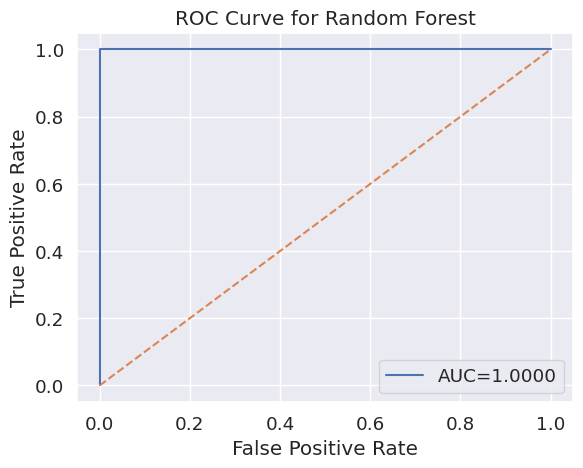

In [85]:
rfc_pred_prob = rfc.predict_proba(x_test)[:,1]  # Use predict_proba to get probabilities for the positive class

rfc_actual_predict = pd.DataFrame({'y_actual': y_test, 'y_pred_prob': rfc_pred_prob})

fpr, tpr, thresholds = roc_curve(rfc_actual_predict['y_actual'], rfc_actual_predict['y_pred_prob'])
auc = roc_auc_score(rfc_actual_predict['y_actual'], rfc_actual_predict['y_pred_prob'])

plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

# Decision Tree

In [126]:
#Define a dictionary of hyperparameters and thier possible values
param_grid = {
    'criterion' : ['gini','entropy'], #splitting crieterion
    'max_depth' : [10,20,30],       #Maximum depth of the tree
    'min_samples_split': [2,5,10], #minimum samples rqd to split an node
    'min_samples_leaf':[1,2,4]   #min samples rqd to be at a leaf node
}

#create a GridSearchCV object
grid_search = GridSearchCV(estimator = dtree,
                          param_grid=param_grid,
                          cv=5)
#                           scoring='accuracy')

#fit the grid search to your training data
grid_search.fit(x_train,y_train)

#get the best hypeparameters
best_params = grid_search.best_params_
print('Best hyperparameters: ',best_params)

#get the best model
best_dtree_model = grid_search.best_estimator_

#make prediction with the best model
dtree_pred = best_dtree_model.predict(x_test)



Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


Text(0.5, 1.0, 'confusion matrix for Decision Tree')

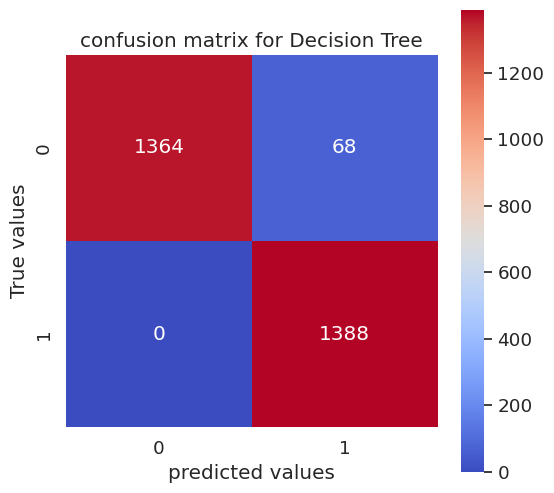

In [127]:
#making confusion matrix
cm=confusion_matrix(y_test,dtree_pred)

#adjust the size of the cm
plt.figure(figsize = (6,6))
sns.set(font_scale = 1.2)

#create a heatmap which show the cm of the decision tree model
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',square=True)

plt.xlabel('predicted values')
plt.ylabel('True values')
plt.title('confusion matrix for Decision Tree')


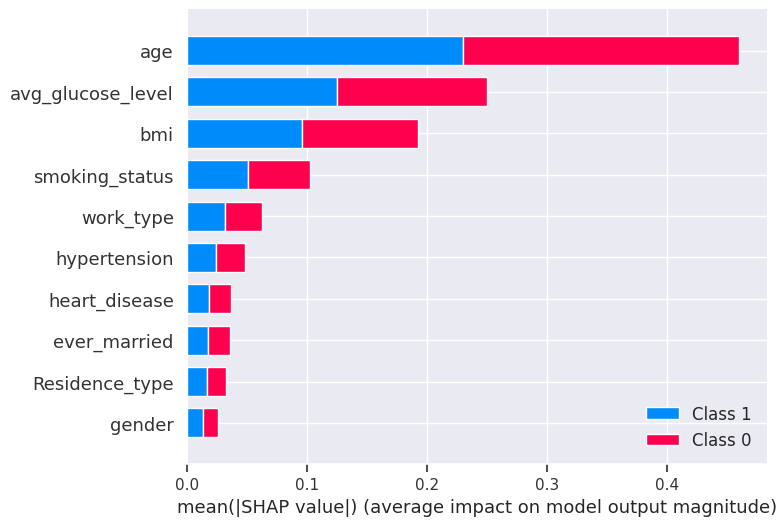

In [128]:
#shap plot for the decision tree model.
explainer = shap.TreeExplainer(dtree) 
shap_values  = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,feature_names = X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


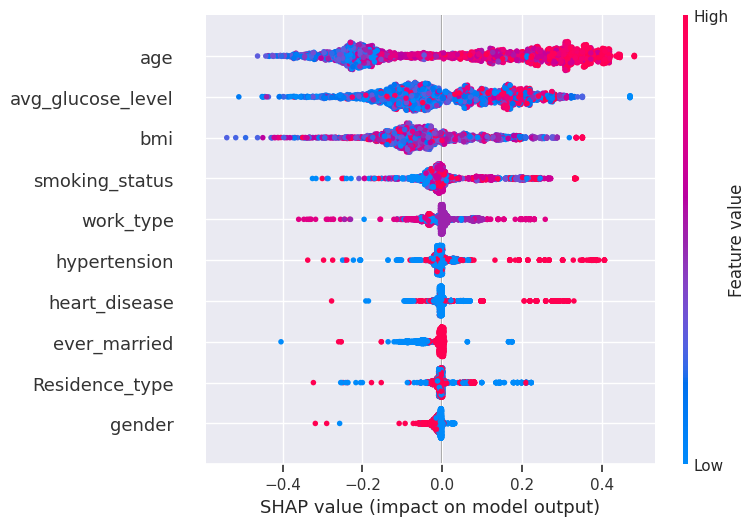

In [129]:
shap.summary_plot(shap_values[1],x_test,feature_names=X.columns)

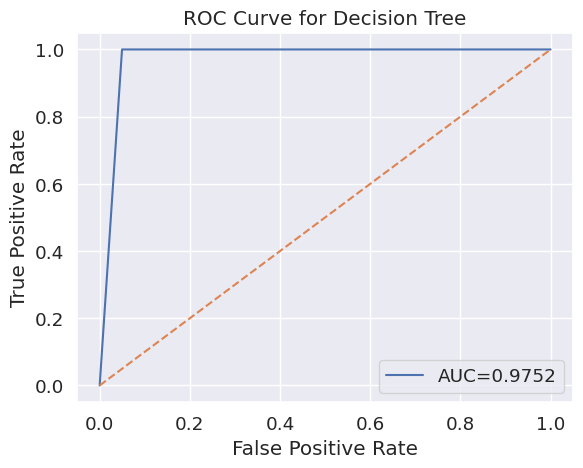

In [130]:

#ROC and AUC score for the decision tree model

dtree_pred_prob = dtree.predict_proba(x_test)[:,1]  # Use predict_proba to get probabilities for the positive class

dtree_actual_predict = pd.DataFrame({'y_actual': y_test, 'y_pred_prob': dtree_pred_prob})

fpr, tpr, thresholds = roc_curve(dtree_actual_predict['y_actual'], dtree_actual_predict['y_pred_prob'])
auc = roc_auc_score(dtree_actual_predict['y_actual'], dtree_actual_predict['y_pred_prob'])

plt.plot(fpr, tpr, label='AUC=%.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

#  Saving Decision Tree Model

In [131]:
import pickle

In [133]:
#use dump() function to save the model with pickle
save_dtree_model = pickle.dumps(best_dtree_model)

#use load() fucntion to loading the saved model
dtree_from_pickle = pickle.loads(save_dtree_model)

#after loading use test data to predict the outcome
dtree_from_pickle.predict(x_test)


# dtree_from_pickle.predict(x_test).shape



array([0, 0, 0, ..., 1, 1, 1])

In [134]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
5               1             186.21  29.0               1       1

In [135]:
# p = dtree_from_pickle.predict(x_test)
# c = pd.DataFrame(p,y_test)
# cmat = confusion_matrix(c,p)
# cmat

In [136]:
dtree_from_pickle.predict([[1,67,0,1,1,2,1,228.69,36.6,1]])

array([0])

In [137]:
#use dump() function to save the model with pickle
save_rfc_model = pickle.dumps(best_rfc_model)

#use load() fucntion to loading the saved model
rfc_from_pickle = pickle.loads(save_rfc_model)

#after loading use test data to predict the outcome
rfc_from_pickle.predict(x_test)





array([0, 0, 0, ..., 1, 1, 1])

In [138]:
rfc_from_pickle.predict([[1,67,0,1,1,2,1,228.69,36.6,1]])

array([0])

In [140]:
# save_dtree_model = pickle.dumps(best_dtree_model)
# dtree_from_pickle = pickle.loads(save_rfc_model)
# dtree_from_pickle.predict(x_test)

In [141]:
rfc_from_pickle.predict([[1,67.0,0,1,1,2,1,228.69,36.6,1]])

array([0])

In [148]:
rfc_from_pickle.predict([x_train[1]])

array([0])

In [154]:
print(x_test)

[[1.         0.63343109 0.         ... 0.03997784 0.22451317 0.66666667]
 [1.         0.21798631 0.         ... 0.05853568 0.15463918 0.        ]
 [0.         0.47458456 0.         ... 0.15788016 0.2371134  0.33333333]
 ...
 [0.         0.97556207 0.         ... 0.0850337  0.15693013 0.        ]
 [0.         0.84115347 0.         ... 0.1812852  0.14318442 0.66666667]
 [0.         0.59677419 0.         ... 0.53600776 0.27605956 1.        ]]


In [162]:
df1 = pd.DataFrame(x_test)
df2 = pd.DataFrame(y_test)


In [164]:
df1.head()
# df2.head()

0         1    2    3    4     5    6         7         8         9
0  1.0  0.633431  0.0  0.0  1.0  0.50  0.0  0.039978  0.224513  0.666667
1  1.0  0.217986  0.0  0.0  0.0  0.50  0.0  0.058536  0.154639  0.000000
2  0.0  0.474585  0.0  0.0  1.0  0.50  0.0  0.157880  0.237113  0.333333
3  1.0  0.706745  0.0  0.0  0.0  0.50  0.0  0.173114  0.248568  0.000000
4  0.0  0.975562  0.0  1.0  1.0  0.75  0.0  0.053550  0.130584  0.333333

In [171]:
rfc_from_pickle.predict([df1.iloc[4,:]])

array([1])

In [169]:
df2.head()

stroke
2976       0
1857       0
4597       0
7653       1
61         1